In [6]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [7]:
def resize_image(image_path, size=(1024, 1024), resize=True, invert=False):
    """Resize the image to the given size."""
    image = cv2.imread(image_path)
    if invert:
        image = cv2.bitwise_not(image)
    if image is None:
        print(f"Failed to load image: {image_path}")
        return None
    if resize:
        return cv2.resize(image, size)
    else:
        return image

In [8]:
def plot_images_side_by_side(images, titles):
    """Plot a list of images side by side with titles."""
    plt.figure(figsize=(12, 4))
    for i, (image, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis('off')
    plt.show()


In [9]:
def Dice(y_true, y_pred):
    """Calculate Dice Coefficient between two binary masks."""
    intersection = np.sum(np.logical_and(y_true , y_pred))
    union = np.sum(y_true) + np.sum(y_pred)
    return 2 * intersection / union




def jaccard_index(y_true, y_pred):
    """Calculate Jaccard Index between two binary masks."""
    intersection = np.sum(y_true * y_pred)
    union = np.sum(y_true) + np.sum(y_pred) - intersection
    return intersection / union

***External Test Set, CV2***

In [ ]:
tissue_dir = r"D:\AIN3007_project\external_test_thumbs"
ground_truth_dir = r"D:\AIN3007_project\external_test_GT_masks"
cv2_mask_dir = r"D:\AIN3007_project\external_test_GT_masks"

total_dice = 0.0
total_jaccard = 0.0
count = 0

for tissue_file in os.listdir(tissue_dir):
    tissue_path = os.path.join(tissue_dir, tissue_file)
    ground_truth_file = tissue_file.replace('.png', '_GT.png')
    ground_truth_path = os.path.join(ground_truth_dir, ground_truth_file)
    cv2_mask_file = tissue_file.replace('.png', '_CV2.png')
    cv2_mask_path = os.path.join(cv2_mask_dir, cv2_mask_file)

    if os.path.isfile(tissue_path) and os.path.isfile(ground_truth_path) and os.path.isfile(cv2_mask_path):
        print(f"Processing: {tissue_file}")
        tissue_image = resize_image(tissue_path, resize=True, invert=False)
        ground_truth_image = resize_image(ground_truth_path, resize=True, invert=True)
        inverted_ground_truth_image = cv2.bitwise_not(ground_truth_image)
        cv2_mask_image = resize_image(cv2_mask_path, resize=True, invert=True)
        inverted_cv2_mask_image = cv2.bitwise_not(cv2_mask_image)
        if tissue_image is not None and ground_truth_image is not None and cv2_mask_image is not None:
            
    
            
            ground_truth_binary = ground_truth_image / 255
            cv2_mask_binary = cv2_mask_image / 255
            
            dice = Dice(ground_truth_binary, cv2_mask_binary)
            jaccard = jaccard_index(ground_truth_binary, cv2_mask_binary)

            total_dice += dice
            total_jaccard += jaccard
            count += 1

            print(f"Dice Coefficient: {dice}")
            print(f"Jaccard Index: {jaccard}")
            plot_images_side_by_side(
                [tissue_image, inverted_ground_truth_image, inverted_cv2_mask_image],
                ['Tissue', 'Ground Truth', 'CV2 Mask']
            )
    else:
        print(f"Matching files not found for: {tissue_file}")

if count > 0:
    average_dice = total_dice / count
    average_jaccard = total_jaccard / count
    print(f"Average Dice Coefficient over {count} images: {average_dice}")
    print(f"Average Jaccard Index over {count} images: {average_jaccard}")
else:
    print("No images were processed.")

***External Test Set, Unet***

Processing: breast__he__10068.png
Dice Coefficient: 0.5299606198182223
Jaccard Index: 0.35600702698158654


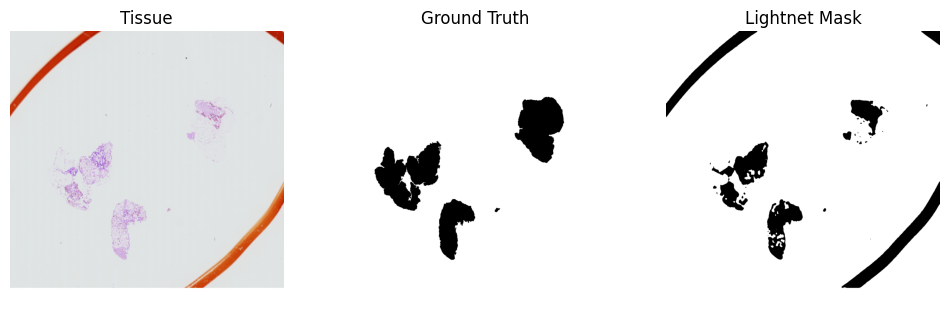

Processing: breast__he__12008.png


KeyboardInterrupt: 

In [10]:
tissue_dir = r"D:\AIN3007_project\external_test_thumbs"
ground_truth_dir = r"D:\AIN3007_project\external_test_GT_masks"
cv2_mask_dir = r"D:\AIN3007_project\external_test_output_0.42"

total_dice = 0.0
total_jaccard = 0.0
count = 0

for tissue_file in os.listdir(tissue_dir):
    tissue_path = os.path.join(tissue_dir, tissue_file)
    ground_truth_file = tissue_file.replace('.png', '_GT.png')
    ground_truth_path = os.path.join(ground_truth_dir, ground_truth_file)
    cv2_mask_file = tissue_file.replace('.png', '_unet.png')
    cv2_mask_path = os.path.join(cv2_mask_dir, cv2_mask_file)

    if os.path.isfile(tissue_path) and os.path.isfile(ground_truth_path) and os.path.isfile(cv2_mask_path):
        print(f"Processing: {tissue_file}")
        tissue_image = resize_image(tissue_path, resize=True, invert=False)
        ground_truth_image = resize_image(ground_truth_path, resize=True, invert=True)
        inverted_ground_truth_image = cv2.bitwise_not(ground_truth_image)
        cv2_mask_image = resize_image(cv2_mask_path, resize=True, invert=True)
        inverted_cv2_mask_image = cv2.bitwise_not(cv2_mask_image)
        if tissue_image is not None and ground_truth_image is not None and cv2_mask_image is not None:
            
    
            
            ground_truth_binary = ground_truth_image / 255
            cv2_mask_binary = cv2_mask_image / 255
            
            dice = Dice(ground_truth_binary, cv2_mask_binary)
            jaccard = jaccard_index(ground_truth_binary, cv2_mask_binary)

            total_dice += dice
            total_jaccard += jaccard
            count += 1

            print(f"Dice Coefficient: {dice}")
            print(f"Jaccard Index: {jaccard}")
            plot_images_side_by_side(
                [tissue_image, inverted_ground_truth_image, inverted_cv2_mask_image],
                ['Tissue', 'Ground Truth', 'Lightnet Mask']
            )
    else:
        print(f"Matching files not found for: {tissue_file}")

if count > 0:
    average_dice = total_dice / count
    average_jaccard = total_jaccard / count
    print(f"Average Dice Coefficient over {count} images: {average_dice}")
    print(f"Average Jaccard Index over {count} images: {average_jaccard}")
else:
    print("No images were processed.")